In [22]:
train_root  = "C:/Users/pc/Documents/archive/chest_xray/train"
test_root = "C:/Users/pc/Documents/archive/chest_xray/test"
print(train_root)

C:/Users/pc/Documents/archive/chest_xray/train


In [23]:
batch_size=5

In [24]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size, shuffle= False)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


2


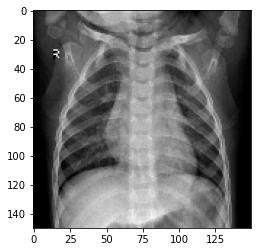

In [25]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)




In [26]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 36, 36, 32)       

In [27]:
#remove optimizer if needed
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_data, batch_size = batch_size, epochs=5)

# score = model.evaluate(train_data)
# print(score)
score = model.evaluate(test_data)
print(score)


Epoch 1/5
1044/1044 [==============================] - 70s 67ms/step - loss: 0.6420 - accuracy: 0.8169
Epoch 2/5
1044/1044 [==============================] - 65s 62ms/step - loss: 0.2345 - accuracy: 0.9097
Epoch 3/5
1044/1044 [==============================] - 65s 63ms/step - loss: 0.2266 - accuracy: 0.9258
Epoch 4/5
1044/1044 [==============================] - 65s 62ms/step - loss: 0.1675 - accuracy: 0.9344
Epoch 5/5
125/125 [==============================] - 6s 46ms/step - loss: 1.0420 - accuracy: 0.7051
[1.0419979095458984, 0.7051281929016113]


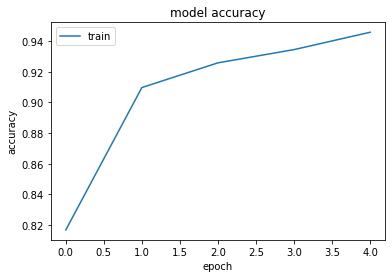

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

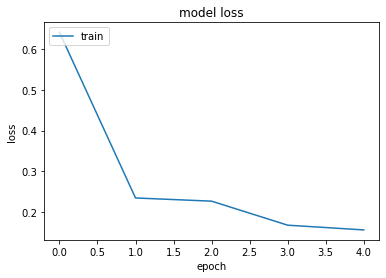

In [29]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


125/125 [==============================] - 5s 42ms/step


<AxesSubplot:>

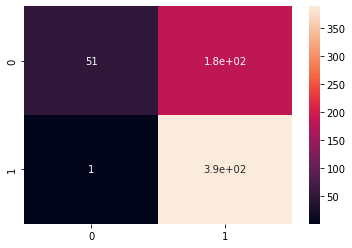

In [30]:
import numpy as np
import seaborn as sns
predict_x=model.predict(test_data) 
classes_x=np.argmax(predict_x,axis=1)
pred = classes_x
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)

In [31]:
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))

0.7051282051282052


In [32]:
from keras.models import save_model
save_model(model, "Pneumonia")

INFO:tensorflow:Assets written to: Pneumonia\assets


INFO:tensorflow:Assets written to: Pneumonia\assets


In [33]:

from flask import Flask, render_template, request
from werkzeug.utils import secure_filename
from skimage import io
from keras.models import load_model
model=load_model("Pneumonia")
import cv2
from PIL import Image #use PIL
import numpy as np
image = cv2.imread("C:/Users/pc/Documents/archive/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
img=cv2.merge([gray,gray,gray])

img.resize((150,150,3))
img=np.asarray(img,dtype="float32")
img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
img.shape
print(model.predict(img))

1/1 [==============================] - 0s 74ms/step
[[0.21362595 0.78637403]]


In [24]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
